<h1 align="center">SLClassificationPro</h1>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

## Data Preparation:

In [98]:
df = pd.read_csv(r"C:\Users\danir\Desktop\קורס AI\פתרונות שב ומטלות\SL\exam\customer_churn_dataset.csv")

In [99]:
churn_df_copy = df.copy()
churn_df_copy

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


***part 1 - Remove unknown columns:***

In [100]:
churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [101]:
# remove "CustomerID" because it’s just an identifier and has no predictive value.
churn_df_copy = churn_df_copy.drop(["CustomerID"], axis=1)

***part 2 - handle missing values:***

In [102]:
missing_data = churn_df_copy.isnull().sum()
total_rows = churn_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows 
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total rows', 'Missing rows', 'percentage missing'])
final_missing_data

,Total rows,Missing rows,percentage missing
Age,64374,0,0.0
Gender,64374,0,0.0
Tenure,64374,0,0.0
Usage Frequency,64374,0,0.0
Support Calls,64374,0,0.0
Payment Delay,64374,0,0.0
Subscription Type,64374,0,0.0
Contract Length,64374,0,0.0
Total Spend,64374,0,0.0
Last Interaction,64374,0,0.0


In [103]:
# checking for meaningless values
for col in churn_df_copy.columns:
    print(f"{col}:")
    print(churn_df_copy[col].unique()[:20]) 
    print("-"*40)

Age:
[22 41 47 35 53 30 54 36 65 46 56 31 42 59 29 45 62 48 55 64]
----------------------------------------
Gender:
['Female' 'Male']
----------------------------------------
Tenure:
[25 28 27  9 58 41 37 36 20  8 42 13  2 46 21  1 54 40 39 50]
----------------------------------------
Usage Frequency:
[14 28 10 12 24 15 11  5  4 27 23  7 17  3 30  2 19 20 18  8]
----------------------------------------
Support Calls:
[ 4  7  2  5  9 10  0  6  1  3  8]
----------------------------------------
Payment Delay:
[27 13 29 17  2 10 28 18  8 23 21 14 25  3  6 15  1  9 30  4]
----------------------------------------
Subscription Type:
['Basic' 'Standard' 'Premium']
----------------------------------------
Contract Length:
['Monthly' 'Annual' 'Quarterly']
----------------------------------------
Total Spend:
[598 584 757 232 533 500 574 323 687 995 526 187 758 438 663 677 636 127
 396 202]
----------------------------------------
Last Interaction:
[ 9 20 21 18 29 14 16  8 10  3  1 24 30 15 25 22

In [104]:
print("After checking, no missing values were found to handle.")

After checking, no missing values were found to handle.


***part 3 - handle duplicated rows:***

In [105]:
duplicate_rows = churn_df_copy[churn_df_copy.duplicated()]
display(duplicate_rows)
print("No duplicated rows to remove")

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


No duplicated rows to remove


***part 4 - Convert categorical features to numerical form using the get_dummies() method:***

In [106]:
categorical_cols = churn_df_copy.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Gender', 'Subscription Type', 'Contract Length']


In [107]:
df_dum = pd.get_dummies(churn_df_copy, columns=categorical_cols, drop_first=True)
print("Shape after dummies:", df_dum.shape)
df_dum.head()

Shape after dummies: (64374, 13)


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,False,False,False,True,False
1,41,28,28,7,13,584,20,0,False,False,True,True,False
2,47,27,10,2,29,757,21,0,True,True,False,False,False
3,35,9,12,5,17,232,18,0,True,True,False,False,True
4,53,58,24,9,2,533,18,0,False,False,True,False,False


## Data exploration: 

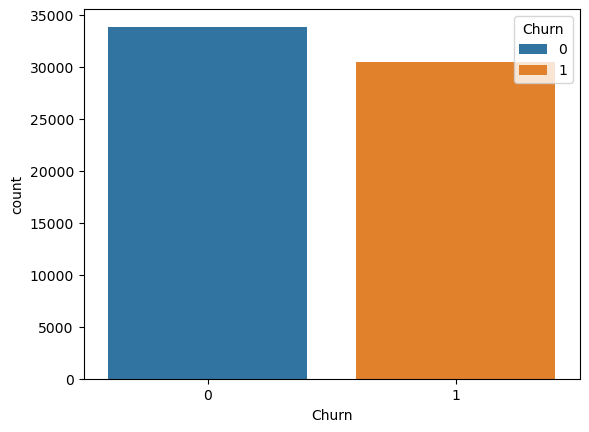

In [108]:
sns.countplot(data=churn_df_copy, x="Churn", hue="Churn")
plt.show()

***part 1 - Check the correlation between each feature to the label column and each feature to 
the other feature:***

Correlations were analyzed before applying get_dummies() to maintain a clear understanding of the original relationships between features.

In [109]:
# all correlations
corr = churn_df_copy.corr(numeric_only=True)
corr

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Age,1.000000,-0.007763,-0.038331,0.005014,-0.016132,0.006490,-0.000148,0.063457
Tenure,-0.007763,1.000000,0.023485,0.060065,0.055963,0.009474,0.005770,0.195327
Usage Frequency,-0.038331,0.023485,1.000000,-0.014072,0.031132,0.001527,-0.009192,-0.115098
Support Calls,0.005014,0.060065,-0.014072,1.000000,0.064298,0.021750,0.001666,0.304631
Payment Delay,-0.016132,0.055963,0.031132,0.064298,1.000000,-0.031119,-0.008076,0.557386
Total Spend,0.006490,0.009474,0.001527,0.021750,-0.031119,1.000000,-0.007692,-0.078867
Last Interaction,-0.000148,0.005770,-0.009192,0.001666,-0.008076,-0.007692,1.000000,-0.002818
Churn,0.063457,0.195327,-0.115098,0.304631,0.557386,-0.078867,-0.002818,1.000000


In [110]:
# correlation to churn
print("Correlation with Churn:\n")
print(corr["Churn"].sort_values(ascending=False))

Correlation with Churn:

Churn               1.000000
Payment Delay       0.557386
Support Calls       0.304631
Tenure              0.195327
Age                 0.063457
Last Interaction   -0.002818
Total Spend        -0.078867
Usage Frequency    -0.115098
Name: Churn, dtype: float64


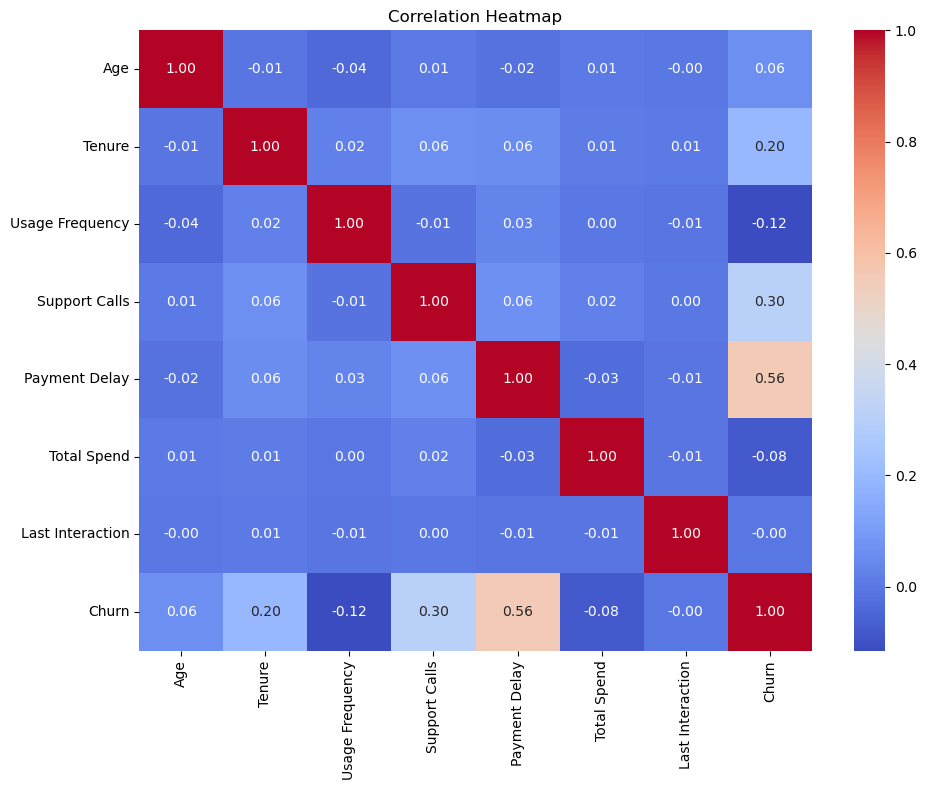

In [111]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Analize correlation after applying get_dummies() to get the full picture:
After applying get_dummies(drop_first=True), one category from each variable is omitted to avoid multicollinearity.
The missing category’s correlation can be inferred as the opposite of the displayed one

In [112]:
# all correlations (after applying get_dummies())
dum_corr = df_dum.corr(numeric_only=True)
dum_corr

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
Age,1.000000,-0.007763,-0.038331,0.005014,-0.016132,0.006490,-0.000148,0.063457,0.001800,-0.004582,0.006161,0.001311,-0.000585
Tenure,-0.007763,1.000000,0.023485,0.060065,0.055963,0.009474,0.005770,0.195327,0.029418,-0.002881,0.005078,-0.003306,0.002310
Usage Frequency,-0.038331,0.023485,1.000000,-0.014072,0.031132,0.001527,-0.009192,-0.115098,-0.006907,0.000364,-0.000744,0.008066,0.005677
Support Calls,0.005014,0.060065,-0.014072,1.000000,0.064298,0.021750,0.001666,0.304631,0.035418,-0.005009,-0.000250,-0.016492,0.005705
Payment Delay,-0.016132,0.055963,0.031132,0.064298,1.000000,-0.031119,-0.008076,0.557386,-0.058578,-0.003979,0.000680,0.028522,-0.012800
Total Spend,0.006490,0.009474,0.001527,0.021750,-0.031119,1.000000,-0.007692,-0.078867,0.029337,0.006925,-0.006608,0.024744,-0.006814
Last Interaction,-0.000148,0.005770,-0.009192,0.001666,-0.008076,-0.007692,1.000000,-0.002818,-0.000472,-0.005186,0.000662,0.000819,0.002925
Churn,0.063457,0.195327,-0.115098,0.304631,0.557386,-0.078867,-0.002818,1.000000,-0.164549,-0.012334,-0.000539,0.061464,-0.046000
Gender_Male,0.001800,0.029418,-0.006907,0.035418,-0.058578,0.029337,-0.000472,-0.164549,1.000000,0.000281,0.005380,-0.028741,0.006856
Subscription Type_Premium,-0.004582,-0.002881,0.000364,-0.005009,-0.003979,0.006925,-0.005186,-0.012334,0.000281,1.000000,-0.500122,0.003127,0.000304


In [113]:
# correlation to churn (after applying get_dummies())
print("Correlation with Churn:\n")
print(dum_corr["Churn"].sort_values(ascending=False))

Correlation with Churn:

Churn                         1.000000
Payment Delay                 0.557386
Support Calls                 0.304631
Tenure                        0.195327
Age                           0.063457
Contract Length_Monthly       0.061464
Subscription Type_Standard   -0.000539
Last Interaction             -0.002818
Subscription Type_Premium    -0.012334
Contract Length_Quarterly    -0.046000
Total Spend                  -0.078867
Usage Frequency              -0.115098
Gender_Male                  -0.164549
Name: Churn, dtype: float64


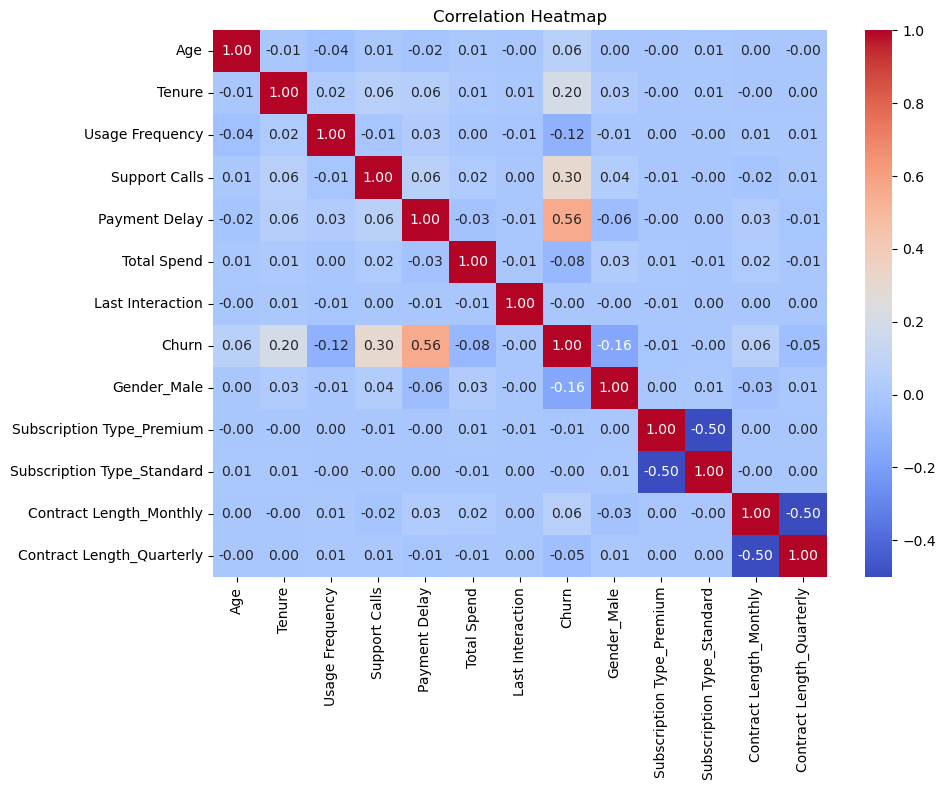

In [114]:
# heatmap (after applying get_dummies())
plt.figure(figsize=(10, 8))
sns.heatmap(dum_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

***part 2 - Generate a pairplot that visualizes those correlations:***

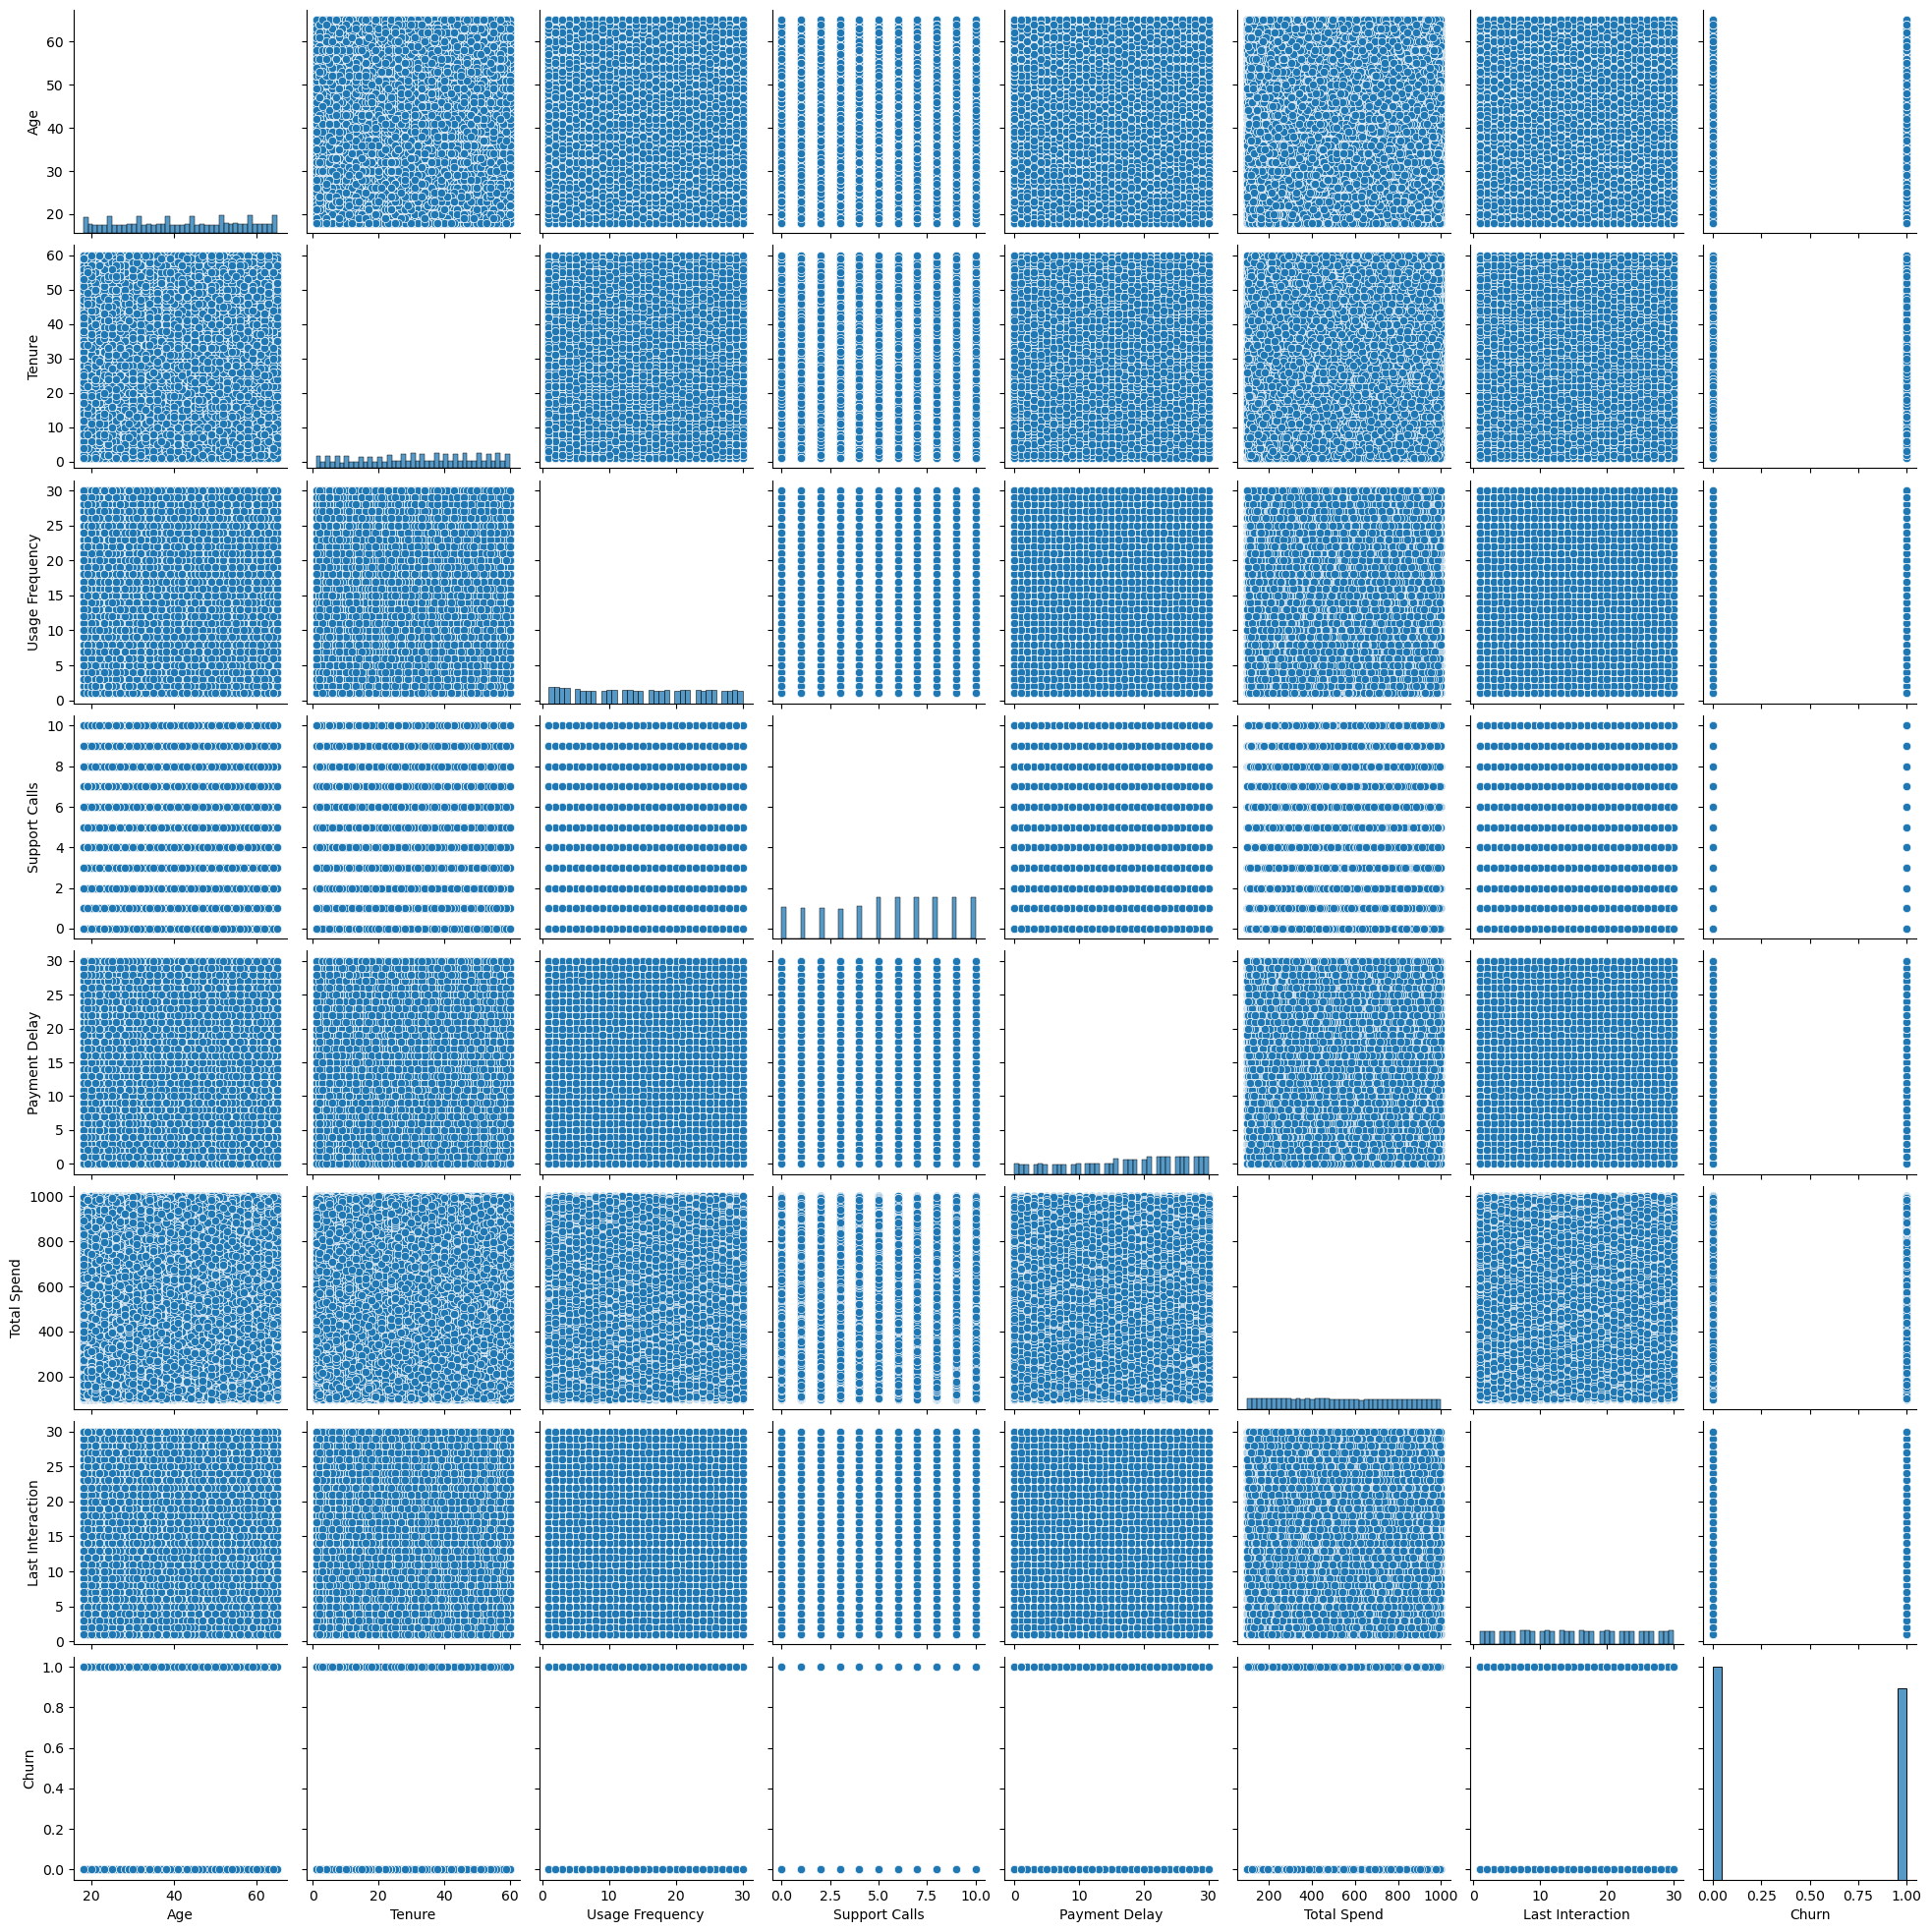

In [115]:
# correlation by pairplot
sns.pairplot(churn_df_copy)

***part 3 - Provide meaningful insight from the correlation check:***

##  Data Exploration – Correlation Analysis

The analiza shows the relationships between all features and the **Churn** label.  

###  **Insights**

- **Payment Delay (0.56)** and **Support Calls (0.30)** show the **strongest positive correlation** with **Churn**.  
  → Customers who frequently delay payments or contact support are much more likely to leave.  

- **Tenure (0.20)** has a **moderate positive correlation** with Churn.  
  → This suggests that even long-term customers may churn, possibly due to dissatisfaction over time or better competing offers.  

- **Usage Frequency (−0.12)** and **Total Spend (−0.08)** show **weak negative correlations** with Churn.  
  → Customers who use the service more often and spend more tend to stay loyal.  

- **Contract Length_Monthly** and **Contract Length_Quarterly** are **strongly negatively correlated (−0.50)** with each other.  
  → This is expected, as they represent alternative contract types (only one can be true for each customer). same correlation we see with **Subscription Type_Premium** and **Subscription Type_Standard**.   

###  **Interpretation**

Overall, **payment behavior** and **support interactions** are the most important churn indicators, reflecting customer frustration or financial issues.  
Meanwhile, **engagement** (usage and spending) reflects satisfaction and loyalty, reducing the likelihood of churn.  


## Classification model training: 

***part 1-2 - Perform feature scaling of type Standardization and Perform train / test split:***

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_dum.drop(["Churn"], axis=1)
y = df_dum["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

***part 3 - use any technique For finding optimal parameter values***

application of this task during **Multi model training** part

### Multi model training:

**part 1 - Perform Logistic Regression with optimal parameters:**

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR_param_grid = {
    "C": np.logspace(-3, 3, 10),  
    "penalty": ["l1", "l2"],      
    "solver": ["liblinear"]      
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
LR_grid = GridSearchCV(log_reg, LR_param_grid, scoring="f1", n_jobs=-1, cv=3)
LR_grid.fit(scaled_X_train, y_train)

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': array([1.0000...00000000e+03]), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [118]:
# performe model with best parameters and predict

best_LR = LR_grid.best_estimator_
best_LR.fit(scaled_X_train, y_train)

y_pred_LR = best_LR.predict(scaled_X_test)
pred_prob_LR = best_LR.predict_proba(scaled_X_test)

**part 2 - Perform KNN with optimal K value:**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

Knn_param_grid = {"n_neighbors": list(range(1, 15))}

knn = KNeighborsClassifier()

Knn_grid = GridSearchCV(knn, Knn_param_grid, scoring="f1", n_jobs=-1, cv=3)
Knn_grid.fit(scaled_X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [120]:
# performe model with best parameters and predict

best_knn = Knn_grid.best_estimator_
best_knn.fit(scaled_X_train, y_train)

y_pred_knn = best_knn.predict(scaled_X_test)
pred_prob_knn = best_knn.predict_proba(scaled_X_test)

***part 3 - Perform SVM with optimal parameters:***

Running a full SVM GridSearch on the entire 64k dataset was computationally expensive due to the quadratic kernel matrix.
To reduce runtime, the search was performed on a stratified subsample of 10k rows with a smaller parameter grid and 3-fold CV.
The final model was then retrained on the full training data using the optimal parameters.

In [121]:
from sklearn.svm import SVC
from sklearn.utils import resample

SVC_param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["rbf", "linear"]
}

X_sub, y_sub = resample(
    scaled_X_train, y_train,
    n_samples=10000,   
    replace=False,
    stratify=y_train,
    random_state=42
)

svm = SVC()

svm_grid= GridSearchCV(svm, SVC_param_grid, scoring='f1', n_jobs=-1, cv=3)
svm_grid.fit(X_sub, y_sub)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [122]:
print("Best params on subsample:", svm_grid.best_params_)
print("Best CV F1 (subsample):", svm_grid.best_score_)

Best params on subsample: {'C': 10, 'kernel': 'rbf'}
Best CV F1 (subsample): 0.9268239706139451


In [123]:
# performe model with best parameters and predict

best_params = svm_grid.best_params_
best_svm = SVC(random_state=42, cache_size=1000, **best_params)
best_svm.fit(scaled_X_train, y_train)

# predict y 
y_pred_svm = best_svm.predict(scaled_X_test)

# In this model, we omitted the use of 'predict_proba' to prevent unnecessary slowdowns during the hyperparameter search.

**part 4 - Perform Random Forest with optimal values:**

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 8, 12],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True],
    "oob_score": [True]
}

rf_grid = GridSearchCV(rf, rf_param_grid, scoring="f1", n_jobs=-1, cv=3)
rf_grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True], 'max_depth': [None, 8, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 4], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [125]:
# performe model with best parameters and predict

best_rf = rf_grid.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)
pred_prob_rf = best_rf.predict_proba(X_test)

## Multi model evaluation and deployment:

**part 1 -  Print the optimal parameters values of each model:**

In [126]:
# best Logistic Regression parameters:

print("Best Parameters:", LR_grid.best_params_)

Best Parameters: {'C': np.float64(0.001), 'penalty': 'l1', 'solver': 'liblinear'}


In [127]:
# best KNN parameters:

print("Best parameters:", Knn_grid.best_params_)

Best parameters: {'n_neighbors': 10}


In [128]:
# best SVM parameters:

print("Best Parameters:", svm_grid.best_params_)

Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [129]:
# best Random Forest parameters:

print("Best Parameters:", rf_grid.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'oob_score': True}


***part 2 - Print the actual predictions for the test set and the percentage of belonging to each 
class:***

In [130]:
# Logistic Regression test set predictions

print("Logistic Regression:")
print("Predicted Classes (first 10):")
print(y_pred_LR[:10])

print("\nPredicted Probabilities (first 10):")
prob_df = pd.DataFrame(pred_prob_LR, columns=best_rf.classes_)
print(prob_df.head(10))

Logistic Regression:
Predicted Classes (first 10):
[1 1 1 0 1 1 0 0 0 1]

Predicted Probabilities (first 10):
          0         1
0  0.478737  0.521263
1  0.485607  0.514393
2  0.102914  0.897086
3  0.911899  0.088101
4  0.315416  0.684584
5  0.121954  0.878046
6  0.955614  0.044386
7  0.981673  0.018327
8  0.973979  0.026021
9  0.385473  0.614527


In [131]:
# KNN test set predictions

print("KNN:")
print("Predicted Classes (first 10):")
print(y_pred_knn[:10])

print("\nPredicted Probabilities (first 10):")
prob_df = pd.DataFrame(pred_prob_knn, columns=best_rf.classes_)
print(prob_df.head(10))

KNN:
Predicted Classes (first 10):
[0 0 1 0 1 1 0 0 0 1]

Predicted Probabilities (first 10):
     0    1
0  0.7  0.3
1  0.5  0.5
2  0.0  1.0
3  1.0  0.0
4  0.0  1.0
5  0.1  0.9
6  1.0  0.0
7  1.0  0.0
8  1.0  0.0
9  0.4  0.6


In [132]:
# SVM test set predictions
print("SVM:")
print("Predicted Classes (first 10):")
print(y_pred_svm[:10])

print("\n No Predicted Probabilities")

SVM:
Predicted Classes (first 10):
[0 1 1 0 1 1 0 0 0 1]

 No Predicted Probabilities


In [133]:
# Random Forest test set predictions

print("Random Forest:")
print("Predicted Classes (first 10):")
print(y_pred_rf[:10])

print("\nPredicted Probabilities (first 10):")
prob_df = pd.DataFrame(pred_prob_rf, columns=best_rf.classes_)
print(prob_df.head(10))

print(f"\nOOB score: {best_rf.oob_score_:.4f}")

Random Forest:
Predicted Classes (first 10):
[0 1 1 0 1 1 0 0 0 0]

Predicted Probabilities (first 10):
       0      1
0  0.828  0.172
1  0.004  0.996
2  0.002  0.998
3  0.994  0.006
4  0.016  0.984
5  0.022  0.978
6  0.994  0.006
7  1.000  0.000
8  1.000  0.000
9  0.964  0.036

OOB score: 0.9982


***part 3 - Evaluate each optimal model using Accuracy, Recall and F1-Score:***

In [134]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix

In [135]:
# Logistic Regression metrics

acc = accuracy_score(y_test, y_pred_LR)
rec = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)

print("Logistic Regression:")
print(f"\nAccuracy: {acc:.3f}")
print(f"Recall:   {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_LR))

Logistic Regression:

Accuracy: 0.826
Recall:   0.861
F1-score: 0.823

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83     10193
           1       0.79      0.86      0.82      9120

    accuracy                           0.83     19313
   macro avg       0.83      0.83      0.83     19313
weighted avg       0.83      0.83      0.83     19313



In [136]:
# KNN metrics

acc = accuracy_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("KNN:")
print(f"\nAccuracy: {acc:.3f}")
print(f"Recall:   {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN:

Accuracy: 0.912
Recall:   0.921
F1-score: 0.908

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     10193
           1       0.90      0.92      0.91      9120

    accuracy                           0.91     19313
   macro avg       0.91      0.91      0.91     19313
weighted avg       0.91      0.91      0.91     19313



In [137]:
# SVM metrics

acc = accuracy_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("SVM:")
print(f"\nAccuracy: {acc:.3f}")
print(f"Recall:   {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM:

Accuracy: 0.953
Recall:   0.959
F1-score: 0.951

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     10193
           1       0.94      0.96      0.95      9120

    accuracy                           0.95     19313
   macro avg       0.95      0.95      0.95     19313
weighted avg       0.95      0.95      0.95     19313



In [138]:
# Random Forest metrics

acc = accuracy_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"\nAccuracy: {acc:.3f}")
print(f"Recall:   {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest:

Accuracy: 0.998
Recall:   0.997
F1-score: 0.998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10193
           1       1.00      1.00      1.00      9120

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



***part 4 - Print for each model the corresponding confusion matrix as a heatmap plot:***

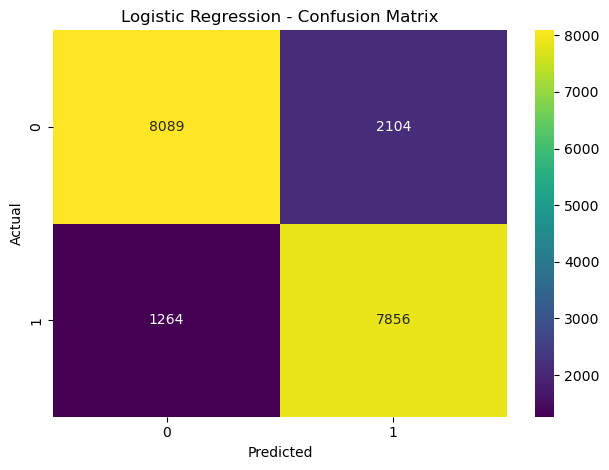

In [139]:
# Logistic Regression Confusion Matrix

cm = confusion_matrix(y_test, y_pred_LR)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

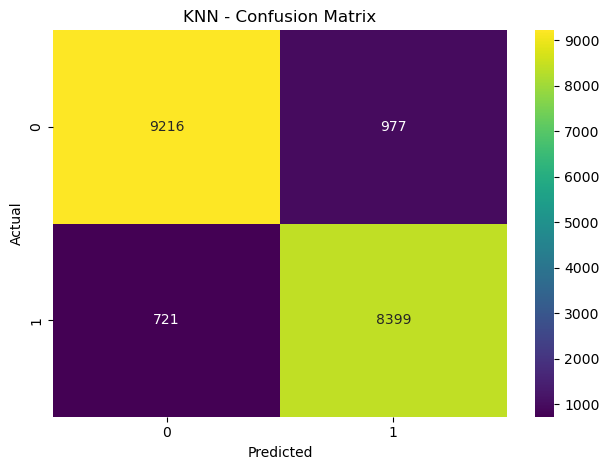

In [140]:
# KNN Confusion Matrix

cm = confusion_matrix(y_test, y_pred_knn)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

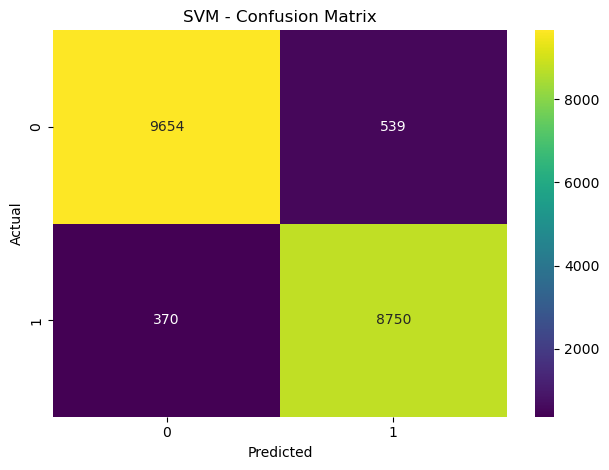

In [141]:
# SVM Confusion Matrix

cm = confusion_matrix(y_test, y_pred_svm)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

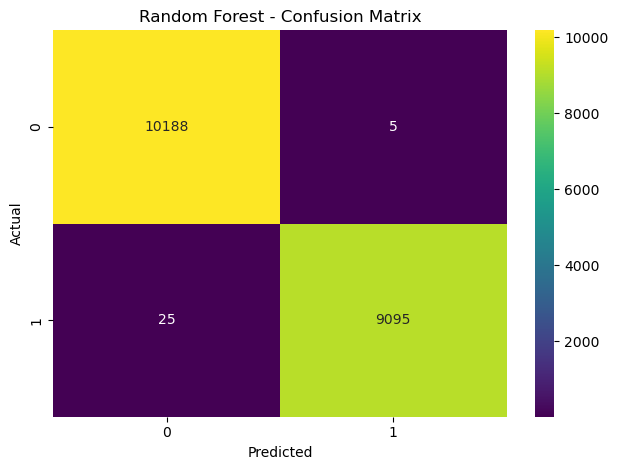

In [142]:
# Random Forest Confusion Matrix

cm = confusion_matrix(y_test, y_pred_rf)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

***part 5 - Generate a dataframe that contains each model and its values for the  Accuracy, 
Recall and F1-Score metrics:***

In [143]:
# Generate a dataframe

metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "SVM", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_LR),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_LR),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_LR),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_rf)
    ]
})

metrics_df = metrics_df.round(3)

# print the dataframe
print("Model Performance Comparison:")
display(metrics_df)

Model Performance Comparison:


,Model,Accuracy,Recall,F1-Score
0,Logistic Regression,0.826,0.861,0.823
1,KNN,0.912,0.921,0.908
2,SVM,0.953,0.959,0.951
3,Random Forest,0.998,0.997,0.998


***part 6 - Choose the model that provided the most accurate prediction:***

**Conclusion:**

The **Random Forest** model achieved the highest accuracy (0.998), recall (0.997), and F1-score (0.998).  
Its OOB score (0.9982) also confirmed excellent performance and very good generalization.  
Therefore, Random Forest was selected as the final model for customer churn prediction.

***part 7 - Train the optimal model on the entire dataset:***

In [144]:
rf_best_params = rf_grid.best_params_

rf_final = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    **rf_best_params
)

rf_final.fit(X, y)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


***part 8 - Export your final model into a joblib file:***

In [145]:
from joblib import dump, load

dump(rf_final, "final_rf_model.joblib")
dump(X.columns.tolist(), "churn_feature_columns.joblib")

print("Final Random Forest model and feature columns saved successfully.")

Final Random Forest model and feature columns saved successfully.


In addition to the model, the feature column names were also exported.  
This ensures that when new data is loaded for prediction, the same column order and structure are used as during training, preventing mismatches or errors.


***part 9 - Import your final model and the preprocessing instances from the joblib files and 
load them back to your working area:***

In [146]:
rf_loaded = load("final_rf_model.joblib")
feature_cols = load("churn_feature_columns.joblib")

print("Final model and feature columns loaded successfully.")

Final model and feature columns loaded successfully.
